In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

In [2]:
df1=pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df2=df1.drop(["availability","society","balcony"],axis="columns")

In [6]:
df2.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df2.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df2['bath']=df2['bath'].fillna(df2['bath'].mean())
df2.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath           0
price          0
dtype: int64

In [9]:
df3=df2.dropna()
df3.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(" ")[0]))
df3.head()

C:\Users\AK\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,2


In [12]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [13]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def convert_sqft_to_no(x):
    try:
        if(len(x.split("-"))==2):
           return float(x[0]+x[1]/2)
        else:
            return float(x)
    
    except:
       return None

In [15]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_no)
df4.head()

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [16]:
df5=df4.copy()

In [17]:
df5['price_per_sqft']=(df5['price']*100000)/df5['total_sqft']

In [18]:
df5.head()

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [19]:
df5["location"]=df5.location.apply(lambda x: x.strip())

In [20]:
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield           540
Sarjapur  Road       397
Electronic City      304
Kanakpura Road       273
Thanisandra          237
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [21]:
len(location_stats[location_stats<=5])

908

In [22]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
Nagappa Reddy Layout     10
Sector 1 HSR Layout      10
1st Block Koramangala    10
Naganathapura            10
Nagadevanahalli          10
                         ..
LIC Colony                1
Kuvempu Layout            1
Kumbhena Agrahara         1
Kudlu Village,            1
1 Annasandrapalya         1
Name: location, Length: 1052, dtype: int64

In [23]:
df5['location']=df5.location.apply(lambda x:'other'if x in location_stats_less_than_10 else x)
len(df5['location'].unique())

242

In [24]:
df5.head()


,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [25]:
df5[df5["total_sqft"]/df5["bhk"]<300]

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,Plot Area,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,Plot Area,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Plot Area,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Plot Area,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Plot Area,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...,...
13277,Plot Area,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,Plot Area,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Plot Area,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Plot Area,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [26]:
df6=df5[~(df5["total_sqft"]/df5["bhk"]<300)]
df6.shape

(12559, 8)

In [27]:
df6['price_per_sqft'].describe()

count     12320.000000
mean       6323.432530
std        4186.147377
min         267.829813
25%        4209.344773
50%        5300.000000
75%        6938.556538
max      176470.588235
Name: price_per_sqft, dtype: float64

In [28]:
def remove_pps_outliers(df):
    res_df=pd.DataFrame()
    for i,sub_df in df.groupby('location'):
        m=np.mean(sub_df.price_per_sqft)
        sd=np.std(sub_df.price_per_sqft)
        reduced_df=sub_df[(sub_df.price_per_sqft>(m-sd)) & (sub_df.price_per_sqft<=(m+sd))]
        res_df=pd.concat([res_df,reduced_df],ignore_index=True)
    return res_df

df7=remove_pps_outliers(df6)
df7.head()

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,Super built-up Area,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,Super built-up Area,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,Built-up Area,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,Super built-up Area,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [29]:
df7.shape

(10145, 8)

In [30]:
def plot_scatter_chart(df,location):
    bhk_2=df[(df.location==location) & (df.bhk==2)]
    bhk_3=df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk_2.total_sqft,bhk_2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk_3.total_sqft,bhk_3.price,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel("Total sqft Area")
    plt.ylabel("price")
    plt.title(location)
    plt.legend()
    

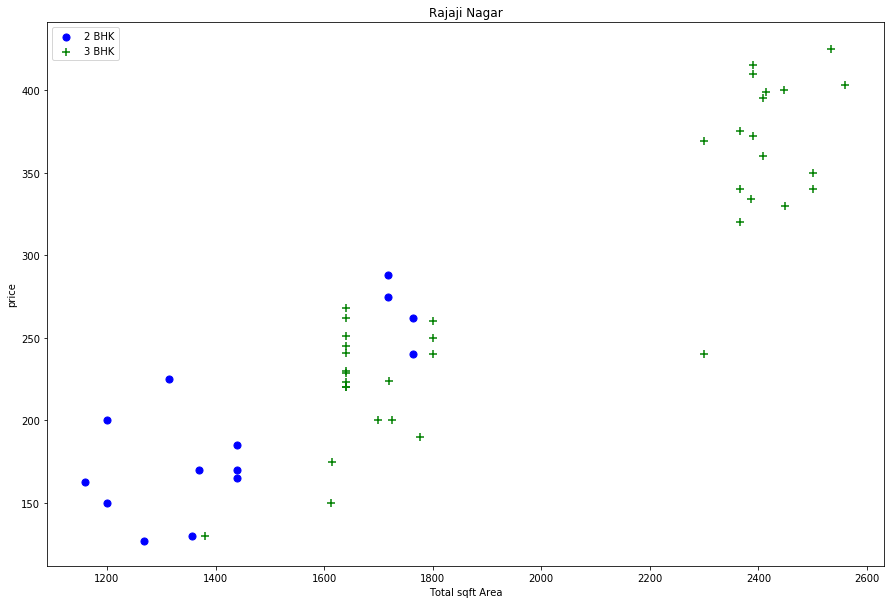

In [31]:
plot_scatter_chart(df7,"Rajaji Nagar")

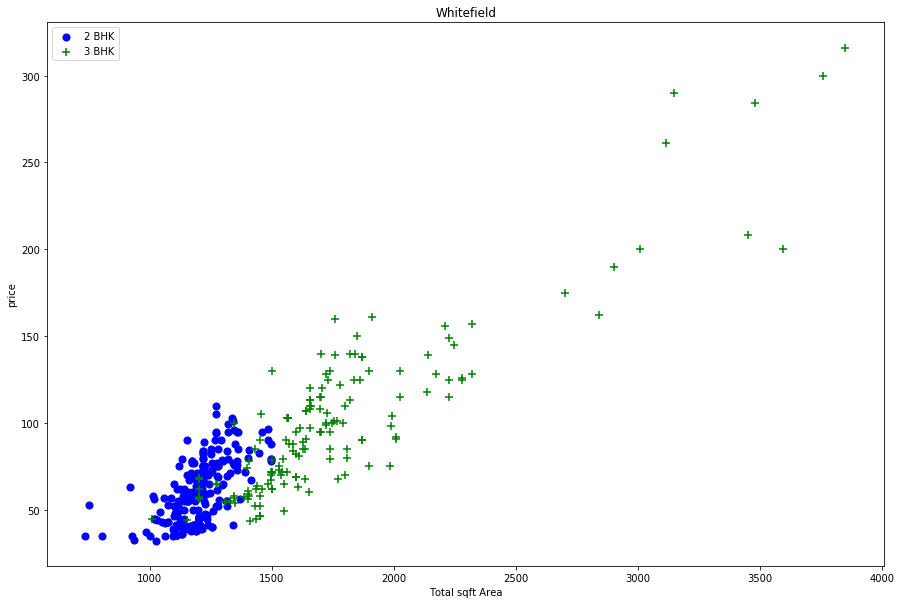

In [32]:
plot_scatter_chart(df7,"Whitefield")

<h3>we can remove <i>Greater</i> BHK appartments whose <u>price per square foot</u> is <b>less</b> than that of <i>Lesser</i> BHK appartments.

In [33]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8=remove_bhk_outliers(df7)
df8.shape

(7222, 8)

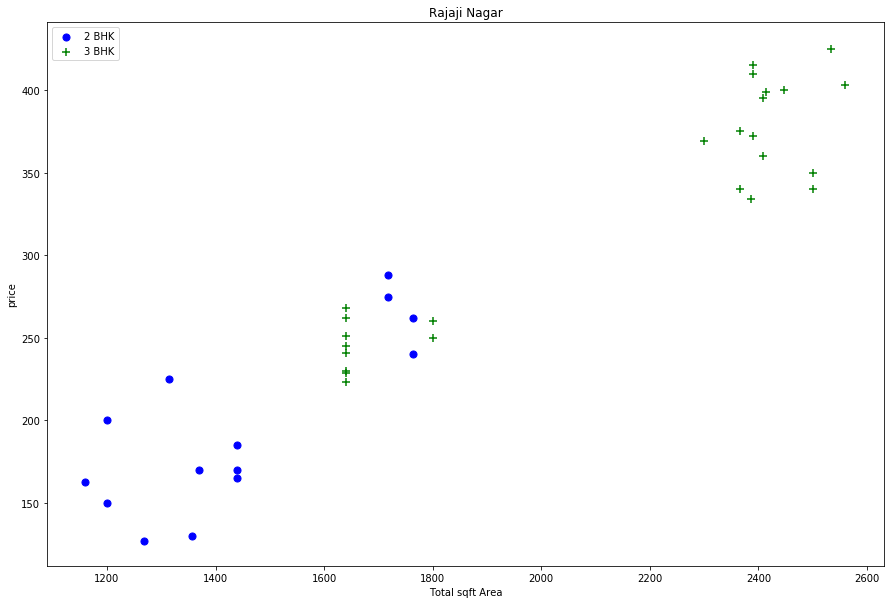

In [34]:
plot_scatter_chart(df8,'Rajaji Nagar')

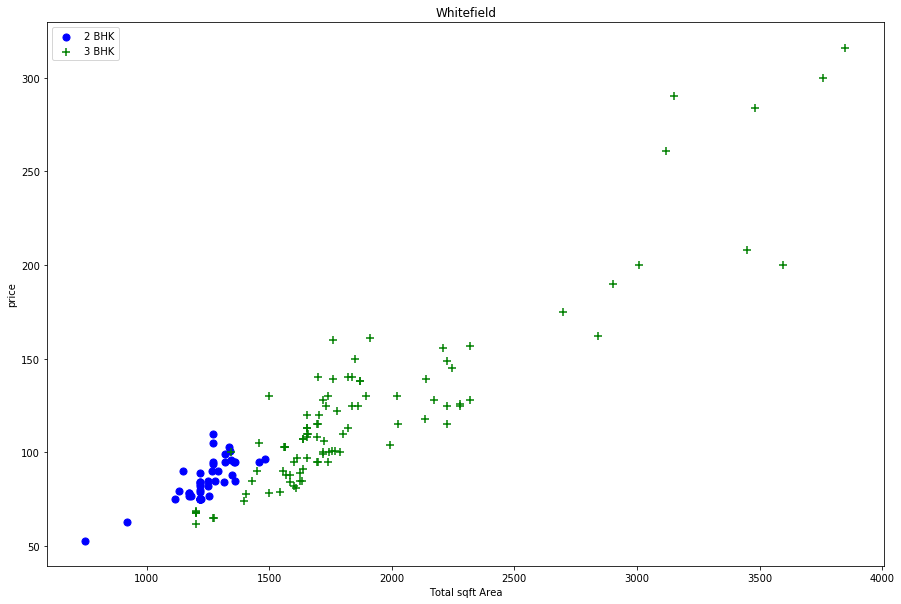

In [35]:
plot_scatter_chart(df8,'Whitefield')

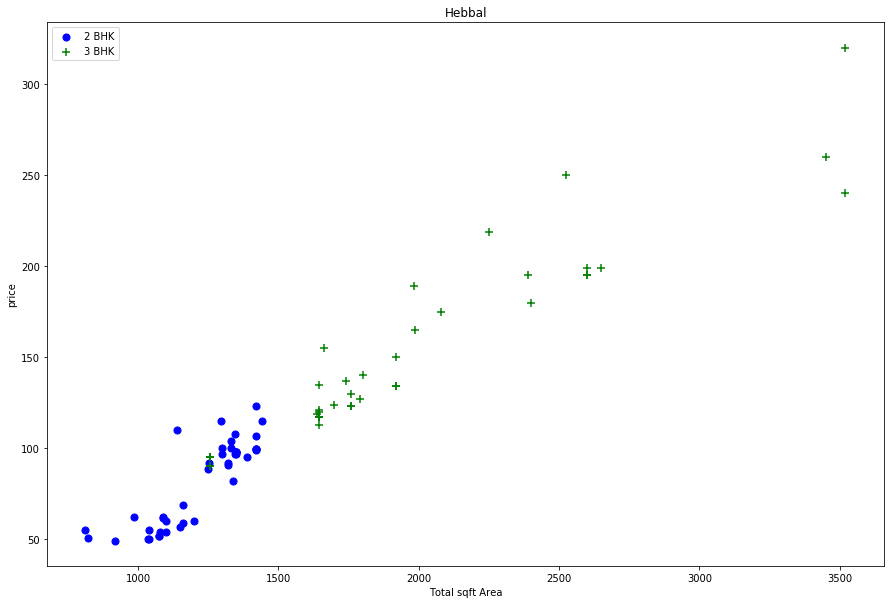

In [36]:
plot_scatter_chart(df8,'Hebbal')

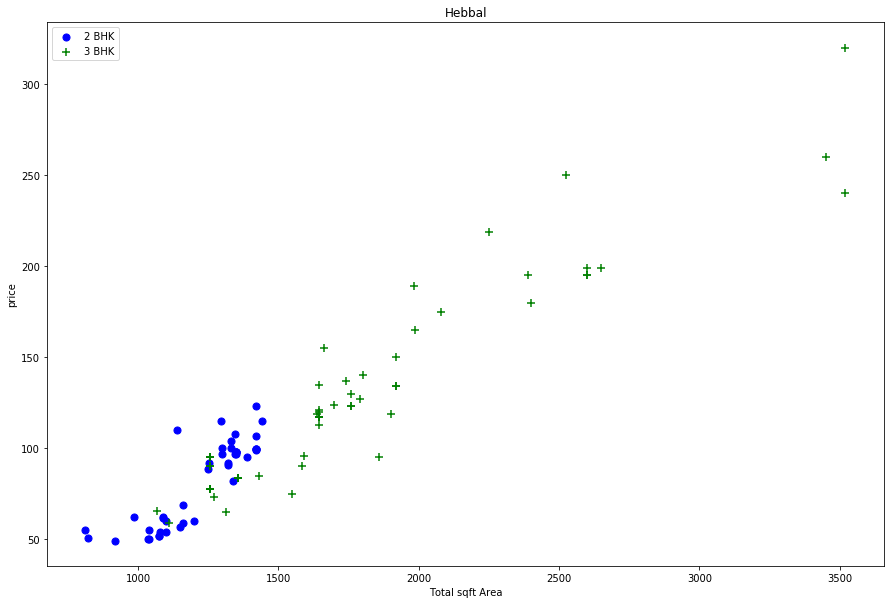

In [37]:
plot_scatter_chart(df7,"Hebbal")

Text(0, 0.5, 'Count')

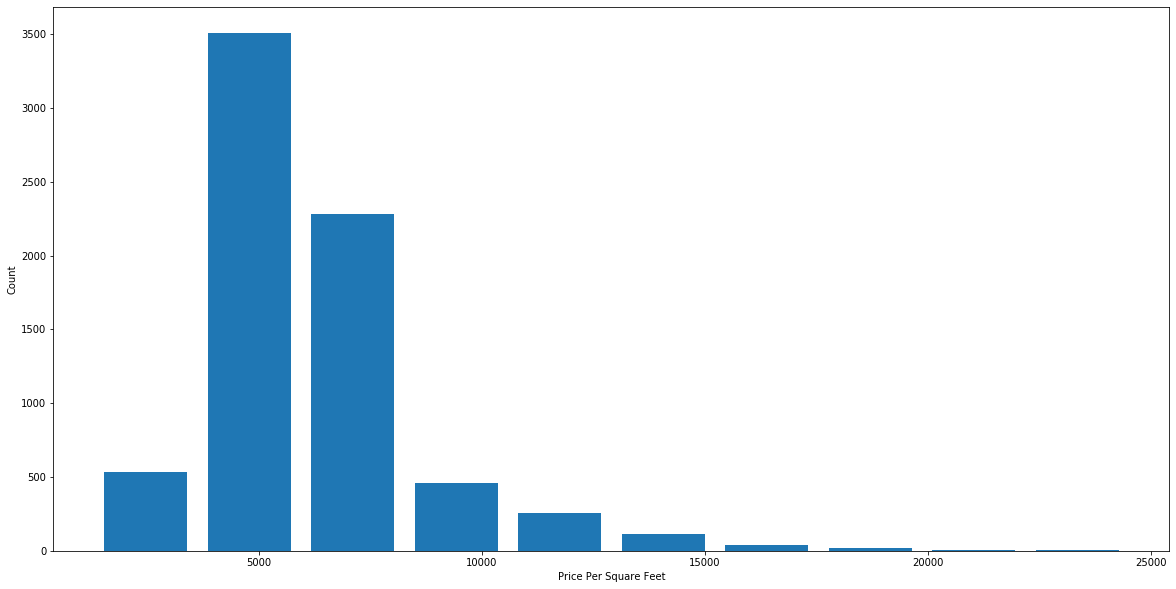

In [38]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [39]:
df8.bath.unique()

array([ 4.        ,  3.        ,  2.        ,  5.        ,  8.        ,
        1.        ,  6.        ,  7.        ,  9.        ,  2.69260965,
       12.        , 16.        , 13.        ])

In [40]:
df8[df8.bath>10]

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
5224,Super built-up Area,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8392,Super built-up Area,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8481,Super built-up Area,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9214,Super built-up Area,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9543,Super built-up Area,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

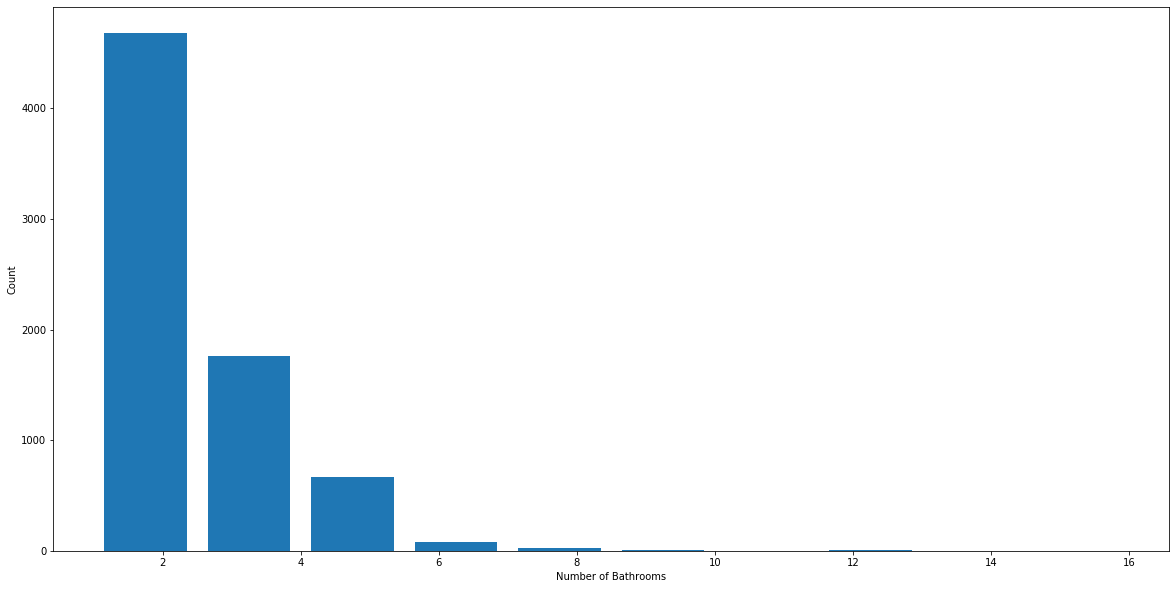

In [41]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

In [42]:
df8[df8.bath>df8.bhk+2]

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
1611,Built-up Area,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5185,Built-up Area,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6643,Super built-up Area,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8317,Super built-up Area,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [43]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(7149, 8)

In [44]:
df10=df9.drop(['size','price_per_sqft'],axis='columns')

In [45]:
df10.head()

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,428.0,4
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,194.0,3
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,235.0,3
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,130.0,3
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,148.0,2


In [46]:
dummies=pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df12=pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df12.head()

,area_type,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df13=df12.drop(['area_type','location'],axis='columns')

In [49]:
df13.shape

(7149, 245)

In [50]:
X=df13.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
y=df13['price']
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)


In [53]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_score=lr.score(x_test,y_test)

# Lasso Regression

In [54]:
from sklearn.linear_model import Lasso
lr_lasso=Lasso()
lr_lasso.fit(x_train,y_train)
lr_lasso_score=lr_lasso.score(x_test,y_test)


# SUPPORT VECTOR MACHINE

In [55]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
svr_score=svr.score(x_test,y_test)

C:\Users\AK\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# RANDOM FOREST REGRESSOR

In [56]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_score=rfr.score(x_test,y_test)

C:\Users\AK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [57]:
print(pd.DataFrame([{'Model': 'Linear Regression','Score':lr_score},
              {'Model': 'Lasso','Score':lr_lasso_score},
              {'Model': 'Support Vector Machine','Score':svr_score},
              {'Model': 'Random Forest','Score':rfr_score}],
             columns=['Model','Score']))

                    Model     Score
0       Linear Regression  0.856016
1                   Lasso  0.728802
2  Support Vector Machine  0.202716
3           Random Forest  0.823274


In [58]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr.predict([x])[0]

In [59]:
predict_price('Vijayanagar',1000,2,2)

62.58838169437239

In [60]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [61]:
predict_price('1st Phase JP Nagar',1450, 4, 4)

124.60212448643418

In [62]:
predict_price('1st Phase JP Nagar',1000, 1, 2)

80.56596178415279

In [63]:
predict_price('Whitefield',1200, 2, 2)

71.16983690419008

In [64]:
predict_price('Whitefield',2000, 2, 2)

134.9752836733033

In [65]:
predict_price('Rajaji Nagar',1640, 3, 3)

281.2214895747452

In [66]:
y_pred = lr.predict(x_test)

In [67]:
coeff_df = pd.DataFrame(lr.coef_, df13.drop('price',axis =1).columns, columns=['Coefficient']) 
coeff_df

,Coefficient
total_sqft,0.079757
bath,3.438841
bhk,-1.085462
1st Block Jayanagar,121.006543
1st Phase JP Nagar,2.521341
...,...
Yelachenahalli,-29.527148
Yelahanka,-34.111556
Yelahanka New Town,-25.673396
Yelenahalli,-54.293302


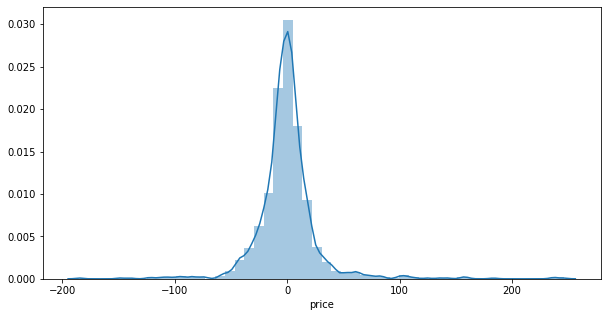

In [68]:
import seaborn as sns
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

In [69]:

# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 16.37503955997423
MSE: 811.3729895412267
RMSE: 28.48460969613638
VarScore: 0.8560179830051527


In [70]:
#compare actual output values with predicted values
y_pred = lr.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1

,Actual,Predicted
4189,65.00,68.592316
3179,75.00,81.723482
6836,41.30,48.028298
2582,61.00,41.325286
7373,67.77,73.523216
2961,57.00,56.495722
7143,162.00,204.483896
5631,98.00,93.811824
1138,135.00,118.612860
7198,155.00,179.560446


# Keras Regression

In [71]:
#pip install tensorflow

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [73]:
# having 4 neuron is based on the number of available features
model = Sequential()
model.add(Dense(245,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')

In [82]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=256,epochs=500)
model.summary()

Epoch 1/500
23/23 [==============================] - 0s 17ms/step - loss: 1377.8351 - val_loss: 700.8922
Epoch 2/500
23/23 [==============================] - 0s 16ms/step - loss: 1882.4006 - val_loss: 1223.7283
Epoch 3/500
23/23 [==============================] - 0s 15ms/step - loss: 1968.1268 - val_loss: 905.8083
Epoch 4/500
23/23 [==============================] - 0s 17ms/step - loss: 1479.0039 - val_loss: 695.1007
Epoch 5/500
23/23 [==============================] - 0s 22ms/step - loss: 1218.9532 - val_loss: 664.1534
Epoch 6/500
23/23 [==============================] - 0s 18ms/step - loss: 1129.3008 - val_loss: 771.2947
Epoch 7/500
23/23 [==============================] - 0s 20ms/step - loss: 1212.7603 - val_loss: 674.7339
Epoch 8/500
23/23 [==============================] - 0s 16ms/step - loss: 1169.4531 - val_loss: 739.2391
Epoch 9/500
23/23 [==============================] - 0s 16ms/step - loss: 1536.9447 - val_loss: 699.5324
Epoch 10/500
23/23 [==============================] - 

Epoch 78/500
23/23 [==============================] - 0s 17ms/step - loss: 1578.2316 - val_loss: 890.1962
Epoch 79/500
23/23 [==============================] - 0s 16ms/step - loss: 1633.6246 - val_loss: 941.2884
Epoch 80/500
23/23 [==============================] - 0s 15ms/step - loss: 1487.0785 - val_loss: 809.5595
Epoch 81/500
23/23 [==============================] - 0s 15ms/step - loss: 1453.1064 - val_loss: 834.4408
Epoch 82/500
23/23 [==============================] - 0s 15ms/step - loss: 1402.9753 - val_loss: 1065.4540
Epoch 83/500
23/23 [==============================] - 1s 26ms/step - loss: 1709.5300 - val_loss: 982.6212
Epoch 84/500
23/23 [==============================] - 0s 15ms/step - loss: 1379.3507 - val_loss: 943.5133
Epoch 85/500
23/23 [==============================] - 1s 26ms/step - loss: 1415.8309 - val_loss: 806.5179
Epoch 86/500
23/23 [==============================] - 0s 16ms/step - loss: 1461.7882 - val_loss: 786.9201
Epoch 87/500
23/23 [=========================

23/23 [==============================] - 0s 21ms/step - loss: 1320.0850 - val_loss: 658.7496
Epoch 155/500
23/23 [==============================] - 0s 17ms/step - loss: 1212.6761 - val_loss: 715.8414
Epoch 156/500
23/23 [==============================] - 0s 17ms/step - loss: 1194.2968 - val_loss: 1116.8804
Epoch 157/500
23/23 [==============================] - 0s 16ms/step - loss: 1333.7177 - val_loss: 713.0822
Epoch 158/500
23/23 [==============================] - 0s 16ms/step - loss: 1060.6689 - val_loss: 812.2125
Epoch 159/500
23/23 [==============================] - 0s 18ms/step - loss: 1177.0760 - val_loss: 846.6137
Epoch 160/500
23/23 [==============================] - 0s 20ms/step - loss: 1586.3954 - val_loss: 1043.3569
Epoch 161/500
23/23 [==============================] - 0s 16ms/step - loss: 1359.1550 - val_loss: 622.7500
Epoch 162/500
23/23 [==============================] - 1s 23ms/step - loss: 1151.0444 - val_loss: 744.7886
Epoch 163/500
23/23 [============================

23/23 [==============================] - 0s 14ms/step - loss: 1303.8593 - val_loss: 636.3193
Epoch 231/500
23/23 [==============================] - 0s 17ms/step - loss: 1141.8472 - val_loss: 621.6803
Epoch 232/500
23/23 [==============================] - 0s 14ms/step - loss: 1120.2284 - val_loss: 797.5136
Epoch 233/500
23/23 [==============================] - 0s 14ms/step - loss: 1125.1448 - val_loss: 630.2609
Epoch 234/500
23/23 [==============================] - 0s 14ms/step - loss: 1223.0922 - val_loss: 1321.1827
Epoch 235/500
23/23 [==============================] - 0s 17ms/step - loss: 1494.7437 - val_loss: 717.7211
Epoch 236/500
23/23 [==============================] - 0s 18ms/step - loss: 1181.9283 - val_loss: 749.3067
Epoch 237/500
23/23 [==============================] - 0s 19ms/step - loss: 1522.6733 - val_loss: 1010.7065
Epoch 238/500
23/23 [==============================] - 0s 18ms/step - loss: 1495.3499 - val_loss: 882.8851
Epoch 239/500
23/23 [============================

23/23 [==============================] - 0s 16ms/step - loss: 1594.7417 - val_loss: 704.0937
Epoch 307/500
23/23 [==============================] - 1s 26ms/step - loss: 1119.1885 - val_loss: 647.7579
Epoch 308/500
23/23 [==============================] - 0s 18ms/step - loss: 1048.3994 - val_loss: 630.6513
Epoch 309/500
23/23 [==============================] - 1s 24ms/step - loss: 1020.5422 - val_loss: 715.1902
Epoch 310/500
23/23 [==============================] - 0s 16ms/step - loss: 1705.8092 - val_loss: 1211.7230
Epoch 311/500
23/23 [==============================] - 1s 25ms/step - loss: 1273.2965 - val_loss: 655.4579
Epoch 312/500
23/23 [==============================] - 0s 20ms/step - loss: 975.9367 - val_loss: 644.5532
Epoch 313/500
23/23 [==============================] - 1s 28ms/step - loss: 1462.5774 - val_loss: 881.4325
Epoch 314/500
23/23 [==============================] - 0s 21ms/step - loss: 1404.4301 - val_loss: 680.6572
Epoch 315/500
23/23 [==============================

23/23 [==============================] - ETA: 0s - loss: 1412.99 - 0s 21ms/step - loss: 1399.4330 - val_loss: 645.0425
Epoch 383/500
23/23 [==============================] - 0s 17ms/step - loss: 1023.5404 - val_loss: 683.2244
Epoch 384/500
23/23 [==============================] - 0s 16ms/step - loss: 1150.0044 - val_loss: 622.9105
Epoch 385/500
23/23 [==============================] - 0s 16ms/step - loss: 1101.2159 - val_loss: 695.6692
Epoch 386/500
23/23 [==============================] - 0s 17ms/step - loss: 1605.3418 - val_loss: 1040.9156
Epoch 387/500
23/23 [==============================] - 0s 16ms/step - loss: 1192.4180 - val_loss: 656.1483
Epoch 388/500
23/23 [==============================] - 0s 16ms/step - loss: 1075.9261 - val_loss: 643.4029
Epoch 389/500
23/23 [==============================] - 0s 21ms/step - loss: 1242.0972 - val_loss: 683.4813
Epoch 390/500
23/23 [==============================] - 0s 20ms/step - loss: 1310.5205 - val_loss: 618.3171
Epoch 391/500
23/23 [===

23/23 [==============================] - 1s 28ms/step - loss: 1334.2466 - val_loss: 1056.6489
Epoch 459/500
23/23 [==============================] - 0s 19ms/step - loss: 1392.1345 - val_loss: 668.8267
Epoch 460/500
23/23 [==============================] - 1s 23ms/step - loss: 1148.5688 - val_loss: 619.8800
Epoch 461/500
23/23 [==============================] - 0s 18ms/step - loss: 1255.9482 - val_loss: 653.9140
Epoch 462/500
23/23 [==============================] - 1s 22ms/step - loss: 1161.2700 - val_loss: 615.8223
Epoch 463/500
23/23 [==============================] - 0s 16ms/step - loss: 1258.4006 - val_loss: 697.1938
Epoch 464/500
23/23 [==============================] - 1s 25ms/step - loss: 1873.8104 - val_loss: 1241.3569
Epoch 465/500
23/23 [==============================] - 0s 19ms/step - loss: 1545.0409 - val_loss: 762.0433
Epoch 466/500
23/23 [==============================] - 1s 27ms/step - loss: 1162.8936 - val_loss: 656.6765
Epoch 467/500
23/23 [============================

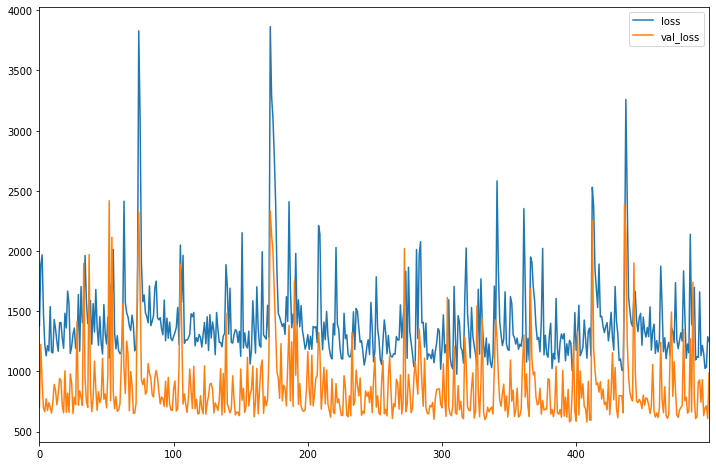

In [83]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [84]:
y_pred = model.predict(x_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 17.062710305594063
MSE: 987.1336016752132
RMSE: 31.4186823669487
VarScore: 0.8540924744776565


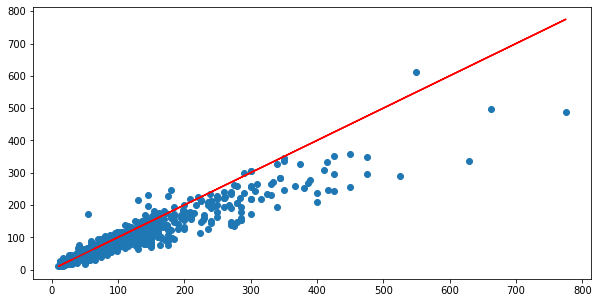

In [85]:
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [90]:
import pickle
with open('REPP.pickle','wb') as f:
    pickle.dump(lr,f)

In [91]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))